# Making a model - Only bikes - Less categorized - Target: Weekend or labor day

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import statistics

In [2]:
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Opening the dataset1 once cleaned. Accidents

In [4]:
data = pd.read_csv('Accidents_cleaned_less_categorized.csv')
pd.set_option("display.max_columns", None)
data.head()

,zona,via,pk,nommun,nomcom,nomdem,f_morts,f_ferits_greus,f_ferits_lleus,f_unitats_implicades,f_vianants_implicades,f_bicicletes_implicades,f_ciclomotors_implicades,f_motocicletes_implicades,f_veh_lleugers_implicades,f_veh_pesants_implicades,f_altres_unit_implicades,c_velocitat_via,d_acc_amb_fuga,d_boira,d_caract_entorn,d_carril_especial,d_circulacio_mesures_esp,d_climatologia,d_func_esp_via,d_gravetat,d_influit_boira,d_influit_caract_entorn,d_influit_circulacio,d_influit_estat_clima,d_influit_inten_vent,d_influit_lluminositat,d_influit_mesu_esp,d_influit_obj_calcada,d_influit_solcs_rases,d_influit_visibilitat,d_inter_seccio,d_limit_velocitat,d_lluminositat,d_regulacio_prioritat,d_sentits_via,d_subtipus_accident,d_subtipus_tram,d_subzona,d_superficie,d_tipus_via,d_titularitat_via,d_tracat_altimetric,d_vent,grupdialab,hor,gruphor,tipacc,year,month,weekday,day_name
0,Zona urbana,SE,over 5,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,0,2,0,0,0,0,1,0,1,60-100,No,No,Desmunt,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Arribant o eixint intersecció fins 50m,Genérica via,"De nit, il·luminació artificial suficient",Sols norma prioritat de pas,Un sol sentit,Encalç,Intersecció en T o Y,Zona urbana,Sec i net,Via urbana( inclou carrer i carrer residencial),Sense Especificar,Sense especificar,"Calma, vent molt suau",Feiners,06:00pm-11:59pm,Nit,Col.lisió de vehicles en marxa,2010,1,0,Monday
1,Carretera,N-240,over 5,LLEIDA,Segria,Lleida,0,1,3,1,0,0,0,0,1,0,0,20-60,No,No,A nivell,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Dintre intersecció,Senyal velocitat,"De nit, il·luminació artificial suficient",Senyal Stop o cedeix pas,Doble sentit,Resta sortides de via,Giratòria,Carretera,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,12:00am-07:59am,Nit,Sortida de la calcada sense especificar,2010,10,6,Sunday
2,Carretera,N-II,over 5,FORNELLS DE LA SELVA,Girones,Girona,1,0,2,4,0,0,0,0,2,2,0,60-100,No,No,A nivell,No n'hi ha,No n'hi ha,Bon temps,Variant,Accident mortal,No,No,No,No,No,No,No,No,No,No,En secció,Senyal velocitat,"De dia, dia clar",Sense Especificar,Doble sentit,Col·lisió frontal,Sense Especificar,Carretera,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,12:00pm-05:59pm,Tarda,Col.lisió de vehicles en marxa,2010,5,0,Monday
3,Zona urbana,SE,over 5,BARCELONA,Barcelones,Barcelona,0,2,7,2,0,0,0,0,2,0,0,60-100,No,No,Sense Especificar,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Dintre intersecció,Genérica via,"De nit, il·luminació artificial suficient",Semàfor,Un sol sentit,Envestida (frontal lateral),Encreuament o intersecció en X o +,Zona urbana,Sec i net,Via urbana( inclou carrer i carrer residencial),Sense Especificar,Sense especificar,"Calma, vent molt suau",CapDeSetmana,06:00pm-11:59pm,Nit,Col.lisió de vehicles en marxa,2010,8,5,Saturday
4,Zona urbana,SE,over 5,BADALONA,Barcelones,Barcelona,0,1,0,1,0,0,0,1,0,0,0,60-100,No,No,Sense Especificar,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Dintre intersecció,Genérica via,"De dia, dia clar",Sols norma prioritat de pas,Un sol sentit,Caiguda en la via,Encreuament o intersecció en X o +,Zona urbana,Sec i net,Via urbana( inclou carrer i carrer residencial),Sense Especificar,Sense especificar,"Calma, vent molt suau",CapDeSetmana,12:00pm-05:59pm,Tarda,Bolcada a la calcada,2010,7,0,Monday


In [5]:
data=data[data['f_bicicletes_implicades']>0]
data.head()

,zona,via,pk,nommun,nomcom,nomdem,f_morts,f_ferits_greus,f_ferits_lleus,f_unitats_implicades,f_vianants_implicades,f_bicicletes_implicades,f_ciclomotors_implicades,f_motocicletes_implicades,f_veh_lleugers_implicades,f_veh_pesants_implicades,f_altres_unit_implicades,c_velocitat_via,d_acc_amb_fuga,d_boira,d_caract_entorn,d_carril_especial,d_circulacio_mesures_esp,d_climatologia,d_func_esp_via,d_gravetat,d_influit_boira,d_influit_caract_entorn,d_influit_circulacio,d_influit_estat_clima,d_influit_inten_vent,d_influit_lluminositat,d_influit_mesu_esp,d_influit_obj_calcada,d_influit_solcs_rases,d_influit_visibilitat,d_inter_seccio,d_limit_velocitat,d_lluminositat,d_regulacio_prioritat,d_sentits_via,d_subtipus_accident,d_subtipus_tram,d_subzona,d_superficie,d_tipus_via,d_titularitat_via,d_tracat_altimetric,d_vent,grupdialab,hor,gruphor,tipacc,year,month,weekday,day_name
52,Zona urbana,SE,over 5,GAVA,Baix Llobregat,Barcelona,0,1,0,1,0,1,0,0,0,0,0,60-100,No,No,Mixt,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,Sense especificar,Si,No,No,Sense especificar,No,No,Si,Si,No,En secció,Genérica via,"De dia, dia clar",Sense Especificar,Un sol sentit,Caiguda en la via,Sense Especificar,Zona urbana,Relliscós,Via urbana( inclou carrer i carrer residencial),Sense Especificar,Sense especificar,"Calma, vent molt suau",Feiners,12:00pm-05:59pm,Matí,Bolcada a la calcada,2010,1,4,Friday
53,Carretera,BV-2415,under 5,OLERDOLA,Alt Penedes,Barcelona,1,0,1,2,0,1,0,1,0,0,0,20-60,No,No,Desmunt,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident mortal,No,No,No,No,No,No,No,No,No,No,Arribant o eixint intersecció fins 50m,Senyal velocitat,"De dia, dia clar",Senyal Stop o cedeix pas,Doble sentit,Encalç,Encreuament o intersecció en X o +,Carretera,Sec i net,Carretera convencional,Provincial,Rampa o pendent,"Calma, vent molt suau",CapDeSetmana,08:00am-11:59am,Matí,Col.lisió de vehicles en marxa,2010,1,6,Sunday
59,Carretera,C-59,under 5,CALDES DE MONTBUI,Valles Oriental,Barcelona,0,1,0,2,0,1,0,0,0,1,0,60-100,No,No,A nivell,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Dintre intersecció,Genérica via,"De dia, dia clar",Sols norma prioritat de pas,Doble sentit,Fregament o col·lisió lateral,Giratòria,Carretera,Sec i net,Carretera convencional,Autonòmica,Pla,"Calma, vent molt suau",Feiners,12:00pm-05:59pm,Tarda,Col.lisió de vehicles en marxa,2010,7,1,Tuesday
70,Carretera,SE,over 5,CERDANYOLA DEL VALLES,Valles Occidental,Barcelona,0,1,0,3,0,1,0,0,1,0,0,20 or under,No,No,A nivell,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,En secció,Senyal velocitat,"De dia, dia clar",Sense Especificar,Doble sentit,Encalç,Sense Especificar,Carretera,Mullat,Altres,Municipal,Rampa o pendent,"Calma, vent molt suau",Feiners,08:00am-11:59am,Matí,Col.lisió de vehicles en marxa,2010,2,2,Wednesday
130,Carretera,N-141e,under 5,BESCANO,Girones,Girona,0,1,0,2,0,1,0,0,1,0,0,60-100,No,No,Mixt,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,En secció,Senyal velocitat,"De nit, sense llum artificial",Sense Especificar,Doble sentit,Encalç,Sense Especificar,Carretera,Sec i net,Carretera convencional,Autonòmica,Pla,"Calma, vent molt suau",Feiners,06:00pm-11:59pm,Tarda,Col.lisió de vehicles en marxa,2010,8,3,Thursday


In [6]:
data.shape

(1723, 57)

In [7]:
def cleankSymbol(x):
    if x in ["Feiners"]:
        return 'Weekday'
    else:
        return 'Weekend'
    
data['grupdialab'] = list(map(cleankSymbol, data['grupdialab']))

# Splitting the dataset with our target = grupdialab = Weekend or labor day

In [8]:
y=data['grupdialab']
X=data.drop('grupdialab', axis=1)
y.value_counts()

Weekday    1087
Weekend     636
Name: grupdialab, dtype: int64

# splitting in train and test data to focus on train features encoding and scaling

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(1206, 56)

(517, 56)

(1206,)

(517,)

In [11]:
X_train_cat = X_train.select_dtypes(include = object)
X_train_num =X_train.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)
X_test_num =X_test.select_dtypes(include = np.number)

In [12]:
display(X_train_cat.shape)
display(X_train_num.shape)
display(X_test_cat.shape)
display(X_test_num.shape) 

(1206, 42)

(1206, 14)

(517, 42)

(517, 14)

# OneHot encoding with categorical features

In [13]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.reset_index(drop = True, inplace = True)
X_train_cat_encode

,zona_Zona urbana,via_AL,via_B-120,via_B-122,via_B-124,via_B-140,via_B-150,via_B-210,via_B-212,via_B-224,via_B-225,via_B-250a,via_B-420,via_B-433,via_B-510,via_B-520,via_B-522,via_B-682,via_BP-1101,via_BP-1121,via_BP-1241,via_BP-1413,via_BP-1417,via_BP-1432,via_BP-1503,via_BP-2121,via_BP-4313,via_BP-5002,via_BP-5107,via_BP-5109,via_BV-1201,via_BV-1212,via_BV-1221,via_BV-1229,via_BV-1243,via_BV-1432,via_BV-1462,via_BV-1468,via_BV-1501,via_BV-1602,via_BV-1604,via_BV-2004,via_BV-2041,via_BV-2115,via_BV-2119,via_BV-2127,via_BV-2128,via_BV-2131,via_BV-2137,via_BV-2151,via_BV-2212,via_BV-2411,via_BV-2415,via_BV-2425,via_BV-2429,via_BV-2441,via_BV-4031,via_BV-4131,via_BV-4241,via_BV-4243,via_BV-4341,via_BV-4406,via_BV-4512,via_BV-5001,via_BV-5011,via_BV-5031,via_BV-5103,via_BV-5105,via_BV-5106,via_BV-5111,via_BV-5114,via_BV-5122,via_BV-5126,via_BV-5222,via_BV-5301,via_BV-5303,via_BV-5305,via_C-12,via_C-13,via_C-14,via_C-1412a,via_C-1413B,via_C-1413a,via_C-1413b,via_C-1415A,via_C-1415a,via_C-1415c,via_C-147,via_C-15,via_C-152,via_C-153,via_C-155,via_C-15B,via_C-16C,via_C-17,via_C-230a,via_C-233,via_C-241C,via_C-242,via_C-243C,via_C-243b,via_C-243c,via_C-245,via_C-246a,via_C-25,via_C-251,via_C-252,via_C-26,via_C-260,via_C-28,via_C-31,via_C-31C,via_C-35,via_C-352,via_C-37,via_C-38,via_C-422,via_C-45,via_C-451,via_C-462,via_C-51,via_C-53,via_C-55,via_C-58,via_C-59,via_C-61,via_C-62,via_C-63,via_C-65,via_C-66,via_CR,via_CR24,via_GI-524,via_GI-532,via_GI-533,via_GI-543,via_GI-550,via_GI-555,via_GI-610,via_GI-612,via_GI-614,via_GI-623,via_GI-660,via_GI-664,via_GI-674,via_GI-682,via_GIP-5107,via_GIP-5121,via_GIP-5237,via_GIP-5244,via_GIV-5043,via_GIV-5224,via_GIV-5241,via_GIV-5248,via_GIV-5264,via_GIV-5273,via_GIV-6024,via_GIV-6621,via_GIV-6701,via_GIV-6703,via_GIV-6741,via_L-303,via_L-310,via_L-401,via_L-702,via_L-800,via_LL-11,via_LP-3322,via_LP-7041,via_LP-9221,via_LV-3025,via_LV-4001,via_LV-4241,via_LV-9225,via_N-141,via_N-141D,via_N-141c,via_N-141e,via_N-145,via_N-150,via_N-152a,via_N-154,via_N-230,via_N-240,via_N-260,via_N-260a,via_N-340,via_N-340a,via_N-II,via_N-IIa,via_SE,via_T-11,via_T-203,via_T-204,via_T-240,via_T-244,via_T-301,via_T-310,via_T-312,via_T-313,via_T-3225,via_T-323,via_T-331,via_T-334,via_T-343,via_T-704,via_T-722,via_T-751,via_TP-2031,via_TP-2125,via_TP-2311,via_TP-3211,via_TP-3311,via_TP-7013,via_TV-2001,via_TV-2041,via_TV-2126,via_TV-2127,via_TV-2443,via_TV-3031,via_TV-3148,via_TV-3313,via_TV-3409,via_TV-3421,via_TV-3443,via_TV-3454,via_TV-7041,via_TV-7046,pk_under 5,nommun_AGRAMUNT,nommun_AIGUAFREDA,nommun_AIGUAMURCIA,nommun_AITONA,nommun_ALAS I CERC,nommun_ALBATARREC,nommun_ALBESA,"nommun_ALBIOL, L'",nommun_ALBONS,nommun_ALCANAR,nommun_ALCARRAS,nommun_ALCOVER,"nommun_ALDEA, L'",nommun_ALELLA,nommun_ALMACELLES,nommun_ALMENAR,nommun_ALT ANEU,nommun_ALTAFULLA,"nommun_AMETLLA DE MAR, L'",nommun_AMPOSTA,nommun_ARBECA,"nommun_ARBO?, L'",nommun_ARENYS DE MAR,nommun_ARENYS DE MUNT,nommun_ARGENCOLA,"nommun_ARGENTERA, L'",nommun_ARGENTONA,nommun_ARNES,nommun_ARSEGUEL,nommun_ARTES,nommun_ARTESA DE SEGRE,"nommun_AVELLANES I SANTA LINYA, LES",nommun_AVIA,nommun_AVINYONET DEL PENEDES,nommun_BADALONA,nommun_BADIA DEL VALLES,nommun_BALAGUER,nommun_BANYOLES,nommun_BARBENS,nommun_BARBERA DEL VALLES,nommun_BARCELONA,nommun_BEGUES,nommun_BELANYA,nommun_BELLVEI,nommun_BELLVER DE CERDANYA,nommun_BENAVENT DE SEGRIA,nommun_BERGA,nommun_BESCANO,nommun_BIGUES I RIELLS,"nommun_BISBAL DEL PENEDES, LA",nommun_BIURE,nommun_BLANES,nommun_BOLVIR,"nommun_BORGES BLANQUES, LES","nommun_BORGES DEL CAMP, LES",nommun_BOSSOST,nommun_BREDA,"nommun_BRUC, EL","nommun_BRULL, EL",nommun_CABANELLES,nommun_CABANES,nommun_CABRERA DE MAR,nommun_CADAQUES,nommun_CALAFELL,nommun_CALDERS,nommun_CALDES DE MALAVELLA,nommun_CALDES DE MONTBUI,nommun_CALELLA,nommun_CALLDETENES,nommun_CALLUS,nommun_CALONGE,nommun_CAMARASA,nommun_CAMARLES,nommun_CAMBRILS,nommun_CANET D'ADRI,nommun_CANOVELLES,nommun_CANOVES I SAMALUS,nommun_CANTALLOPS,nommun_CANYELLES,nommun_CAPOLAT,nommun

In [14]:
encoder = OneHotEncoder(drop='first').fit(X_test_cat)
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.reset_index(drop = True, inplace = True)
X_test_cat_encode


,zona_Zona urbana,via_AL,via_B-120,via_B-122,via_B-124,via_B-140,via_B-224,via_B-402,via_B-431,via_B-500,via_B-502,via_B-520,via_B-682,via_BP-1121,via_BP-1413,via_BP-1417,via_BP-1503,via_BP-2121,via_BP-2126,via_BV-1201,via_BV-1221,via_BV-1462,via_BV-2041,via_BV-2111,via_BV-2115,via_BV-2137,via_BV-2443,via_BV-3003,via_BV-4024,via_BV-4316,via_BV-4401,via_BV-4608,via_BV-5001,via_BV-5011,via_BV-5103,via_BV-5106,via_BV-5128,via_BV-5151,via_BV-5202,via_BV-5224,via_BV-5301,via_BV-5303,via_C-12,via_C-13,via_C-14,via_C-1413B,via_C-1413a,via_C-1415A,via_C-1415a,via_C-1415c,via_C-153,via_C-153a,via_C-15B,via_C-15z,via_C-17,via_C-230a,via_C-233,via_C-243B,via_C-245,via_C-25,via_C-250,via_C-26,via_C-260,via_C-31,via_C-31B,via_C-35,via_C-352,via_C-37z,via_C-43,via_C-51,via_C-55,via_C-59,via_C-61,via_C-63,via_C-65,via_C-66,via_CR,via_CR24,via_CR8,via_GI-500,via_GI-503,via_GI-520,via_GI-524,via_GI-531,via_GI-543,via_GI-610,via_GI-613,via_GI-614,via_GI-623,via_GI-631,via_GI-680,via_GI-682,via_GIP-6307,via_GIP-6821,via_GIV-5313,via_GIV-5334,via_GIV-5512,via_GIV-6612,via_GIV-6703,via_L-200,via_L-702,via_LP-3322,via_LP-7041,via_LV-2001,via_N-141c,via_N-141g,via_N-145,via_N-150,via_N-230,via_N-240,via_N-260,via_N-340,via_N-340a,via_N-420,via_N-II,via_N-IIa,via_SE,via_T-318,via_T-320,via_T-322,via_T-3225,via_T-740,via_TP-2039,via_TP-2442,via_TV-2122,via_TV-2333,via_TV-3421,via_TV-3454,via_TV-7042,via_VM-4406,pk_under 5,nommun_AGULLANA,nommun_AITONA,nommun_ALAS I CERC,nommun_ALCANAR,"nommun_ALDEA, L'",nommun_ALP,nommun_ALTAFULLA,"nommun_AMETLLA DE MAR, L'","nommun_AMPOLLA, L'",nommun_AMPOSTA,nommun_ARBUCIES,nommun_ARENYS DE MAR,nommun_ARGENTONA,nommun_ARTES,nommun_BADALONA,nommun_BANYERES DEL PENEDES,nommun_BANYOLES,nommun_BARBERA DEL VALLES,nommun_BARCELONA,nommun_BEGUES,nommun_BESCANO,nommun_BEUDA,"nommun_BISBAL DEL PENEDES, LA",nommun_BLANES,nommun_BORREDA,nommun_BRAFIM,nommun_BRUNYOLA,nommun_CABRERA DE MAR,nommun_CADAQUES,nommun_CALDERS,nommun_CALDES DE MONTBUI,nommun_CALLUS,nommun_CALONGE,nommun_CAMBRILS,nommun_CAMPINS,nommun_CAMPRODON,nommun_CANET D'ADRI,nommun_CANOVELLES,nommun_CAPMANY,nommun_CARDEDEU,nommun_CASSA DE LA SELVA,nommun_CASTELL-PLATJA D'ARO,nommun_CASTELLAR DE N'HUG,nommun_CASTELLAR DEL VALLES,nommun_CASTELLBELL I EL VIL,nommun_CASTELLBISBAL,nommun_CASTELLDEFELS,nommun_CASTELLET I LA GORNA,nommun_CASTELLGALI,nommun_CASTELLO D'EMPURIES,nommun_CASTELLVI DE ROSANES,"nommun_CATLLAR, EL",nommun_CENTELLES,nommun_CERDANYOLA DEL VALLES,nommun_COLLBATO,nommun_CORCA,nommun_CORNELLA DE LLOBREGAT,nommun_CORNUDELLA DE MONTSANT,"nommun_CRUILLES, MONELLS I SANT SADURNI DE L'HE",nommun_CUBELLES,nommun_DELTEBRE,"nommun_ESCALA, L'",nommun_ESPLUGUES DE LLOBREGAT,nommun_FIGUERES,nommun_FLIX,nommun_FONT-RUBI,nommun_FORALLAC,nommun_FRANQUESES DEL VALLE,nommun_GAIA,nommun_GANDESA,"nommun_GARRIGA, LA",nommun_GAVA,nommun_GIRONA,nommun_GOLMES,nommun_GOMBREN,"nommun_GRANADA, LA",nommun_GUALTA,nommun_GUARDIOLA DE BERGUEDA,nommun_HOSPITALET DE LLOBREGAT,nommun_IGUALADA,nommun_IVARS D'URGELL,nommun_JORBA,"nommun_LLACUNA, LA","nommun_LLAGOSTA, LA",nommun_LLEIDA,nommun_LLES DE CERDANYA,nommun_LLICA D'AMUNT,nommun_LLINARS DEL VALLES,nommun_LLOREN? DEL PENEDES,nommun_LLORET DE MAR,nommun_MACANET DE CABRENYS,nommun_MACANET DE LA SELVA,nommun_MADREMANYA,nommun_MALGRAT DE MAR,nommun_MANRESA,nommun_MARGANELL,nommun_MARTORELL,nommun_MARTORELLES,"nommun_MASIES DE VOLTREGA,LES","nommun_MASNOU, EL",nommun_MASQUEFA,nommun_MATADEPERA,nommun_MATARO,nommun_MEDIONA,nommun_MOIA,nommun_MOLINS DE REI,nommun_MOLLERUSSA,nommun_MOLLET DEL VALLES,nommun_MONISTROL DE CALDERS,nommun_MONISTROL DE MONTSER,nommun_MONT-RAS,nommun_MONT-ROIG DEL CAMP,nommun_MONTBLANC,nommun_MONTFERRER I CASTELLBO,"nommun_MONTMELL, EL",nommun_MONTMELO,nommun_NAUT ARAN,nommun_OLERDOLA,nommun_OLESA DE MONTSERRAT,nommun_OLOT,nommun_PALAFOLLS,nommun_PALAFRUGELL,nommun_PALAMOS,nommun_PALAU DE PLEGAMANS,nommun_PALAU-SAVERDERA,"nommun_PAPIOL, EL","nommun_PERA, LA","nommun_PERELLO, EL",nommun_PINOS,"nommun_PLANES D'

# Scaling with numerical features

In [15]:
transformer = MinMaxScaler().fit(X_train_num)
X_train_num_norm = transformer.transform(X_train_num)
print(X_train_num_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_num_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()
X_train_num_scale.reset_index(drop = True, inplace = True)

(1206, 14)


In [16]:
X_test_num_norm = transformer.transform(X_test_num)
print(X_test_num_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_num_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.reset_index(drop = True, inplace=True)
X_test_num_scale

(517, 14)


,f_morts,f_ferits_greus,f_ferits_lleus,f_unitats_implicades,f_vianants_implicades,f_bicicletes_implicades,f_ciclomotors_implicades,f_motocicletes_implicades,f_veh_lleugers_implicades,f_veh_pesants_implicades,f_altres_unit_implicades,year,month,weekday
0,0.0,0.333333,0.000000,0.166667,0.0,0.0,0.0,0.0,0.000000,0.5,0.0,0.363636,0.727273,0.333333
1,0.0,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.636364,0.818182,0.333333
2,0.0,0.333333,0.000000,0.166667,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.090909,0.272727,0.166667
3,0.0,0.333333,0.166667,0.166667,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.818182,0.727273,1.000000
4,0.0,0.333333,0.000000,0.166667,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.181818,0.636364,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.0,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.818182,1.000000,0.333333
513,0.0,0.333333,0.000000,0.166667,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.363636,0.636364,0.000000
514,0.0,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.909091,0.000000,0.166667
515,0.0,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.090909,1.000000


# Concating numerical and categorical for train and test

In [17]:
X_train = pd.concat([X_train_num_scale,X_train_cat_encode], axis=1)
X_train.index
y_train.reset_index(drop = True, inplace = True)

In [18]:
X_test = pd.concat([X_test_num_scale,X_test_cat_encode], axis=1)
X_test.index
y_test.reset_index(drop = True, inplace = True)

In [19]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape) 

(1206, 775)

(1206,)

(517, 531)

(517,)

# making full df for training set for feature selection

In [20]:
data_train = pd.concat([X_train,y_train],axis = 1)
data_train.head(10)

,f_morts,f_ferits_greus,f_ferits_lleus,f_unitats_implicades,f_vianants_implicades,f_bicicletes_implicades,f_ciclomotors_implicades,f_motocicletes_implicades,f_veh_lleugers_implicades,f_veh_pesants_implicades,f_altres_unit_implicades,year,month,weekday,zona_Zona urbana,via_AL,via_B-120,via_B-122,via_B-124,via_B-140,via_B-150,via_B-210,via_B-212,via_B-224,via_B-225,via_B-250a,via_B-420,via_B-433,via_B-510,via_B-520,via_B-522,via_B-682,via_BP-1101,via_BP-1121,via_BP-1241,via_BP-1413,via_BP-1417,via_BP-1432,via_BP-1503,via_BP-2121,via_BP-4313,via_BP-5002,via_BP-5107,via_BP-5109,via_BV-1201,via_BV-1212,via_BV-1221,via_BV-1229,via_BV-1243,via_BV-1432,via_BV-1462,via_BV-1468,via_BV-1501,via_BV-1602,via_BV-1604,via_BV-2004,via_BV-2041,via_BV-2115,via_BV-2119,via_BV-2127,via_BV-2128,via_BV-2131,via_BV-2137,via_BV-2151,via_BV-2212,via_BV-2411,via_BV-2415,via_BV-2425,via_BV-2429,via_BV-2441,via_BV-4031,via_BV-4131,via_BV-4241,via_BV-4243,via_BV-4341,via_BV-4406,via_BV-4512,via_BV-5001,via_BV-5011,via_BV-5031,via_BV-5103,via_BV-5105,via_BV-5106,via_BV-5111,via_BV-5114,via_BV-5122,via_BV-5126,via_BV-5222,via_BV-5301,via_BV-5303,via_BV-5305,via_C-12,via_C-13,via_C-14,via_C-1412a,via_C-1413B,via_C-1413a,via_C-1413b,via_C-1415A,via_C-1415a,via_C-1415c,via_C-147,via_C-15,via_C-152,via_C-153,via_C-155,via_C-15B,via_C-16C,via_C-17,via_C-230a,via_C-233,via_C-241C,via_C-242,via_C-243C,via_C-243b,via_C-243c,via_C-245,via_C-246a,via_C-25,via_C-251,via_C-252,via_C-26,via_C-260,via_C-28,via_C-31,via_C-31C,via_C-35,via_C-352,via_C-37,via_C-38,via_C-422,via_C-45,via_C-451,via_C-462,via_C-51,via_C-53,via_C-55,via_C-58,via_C-59,via_C-61,via_C-62,via_C-63,via_C-65,via_C-66,via_CR,via_CR24,via_GI-524,via_GI-532,via_GI-533,via_GI-543,via_GI-550,via_GI-555,via_GI-610,via_GI-612,via_GI-614,via_GI-623,via_GI-660,via_GI-664,via_GI-674,via_GI-682,via_GIP-5107,via_GIP-5121,via_GIP-5237,via_GIP-5244,via_GIV-5043,via_GIV-5224,via_GIV-5241,via_GIV-5248,via_GIV-5264,via_GIV-5273,via_GIV-6024,via_GIV-6621,via_GIV-6701,via_GIV-6703,via_GIV-6741,via_L-303,via_L-310,via_L-401,via_L-702,via_L-800,via_LL-11,via_LP-3322,via_LP-7041,via_LP-9221,via_LV-3025,via_LV-4001,via_LV-4241,via_LV-9225,via_N-141,via_N-141D,via_N-141c,via_N-141e,via_N-145,via_N-150,via_N-152a,via_N-154,via_N-230,via_N-240,via_N-260,via_N-260a,via_N-340,via_N-340a,via_N-II,via_N-IIa,via_SE,via_T-11,via_T-203,via_T-204,via_T-240,via_T-244,via_T-301,via_T-310,via_T-312,via_T-313,via_T-3225,via_T-323,via_T-331,via_T-334,via_T-343,via_T-704,via_T-722,via_T-751,via_TP-2031,via_TP-2125,via_TP-2311,via_TP-3211,via_TP-3311,via_TP-7013,via_TV-2001,via_TV-2041,via_TV-2126,via_TV-2127,via_TV-2443,via_TV-3031,via_TV-3148,via_TV-3313,via_TV-3409,via_TV-3421,via_TV-3443,via_TV-3454,via_TV-7041,via_TV-7046,pk_under 5,nommun_AGRAMUNT,nommun_AIGUAFREDA,nommun_AIGUAMURCIA,nommun_AITONA,nommun_ALAS I CERC,nommun_ALBATARREC,nommun_ALBESA,"nommun_ALBIOL, L'",nommun_ALBONS,nommun_ALCANAR,nommun_ALCARRAS,nommun_ALCOVER,"nommun_ALDEA, L'",nommun_ALELLA,nommun_ALMACELLES,nommun_ALMENAR,nommun_ALT ANEU,nommun_ALTAFULLA,"nommun_AMETLLA DE MAR, L'",nommun_AMPOSTA,nommun_ARBECA,"nommun_ARBO?, L'",nommun_ARENYS DE MAR,nommun_ARENYS DE MUNT,nommun_ARGENCOLA,"nommun_ARGENTERA, L'",nommun_ARGENTONA,nommun_ARNES,nommun_ARSEGUEL,nommun_ARTES,nommun_ARTESA DE SEGRE,"nommun_AVELLANES I SANTA LINYA, LES",nommun_AVIA,nommun_AVINYONET DEL PENEDES,nommun_BADALONA,nommun_BADIA DEL VALLES,nommun_BALAGUER,nommun_BANYOLES,nommun_BARBENS,nommun_BARBERA DEL VALLES,nommun_BARCELONA,nommun_BEGUES,nommun_BELANYA,nommun_BELLVEI,nommun_BELLVER DE CERDANYA,nommun_BENAVENT DE SEGRIA,nommun_BERGA,nommun_BESCANO,nommun_BIGUES I RIELLS,"nommun_BISBAL DEL PENEDES, LA",nommun_BIURE,nommun_BLANES,nommun_BOLVIR,"nommun_BORGES BLANQUES, LES","nommun_BORGES DEL CAMP, LES",nommun_BOSSOST,nommun_BREDA,"nommun_BRUC, EL","nommun_BRULL, EL",nommun_CABANELLES,nommun_CABANES,nommun_CABRERA DE MAR,nommun_CADAQUES,nommun_CALAFELL,nommun_CALDERS,nommun_CALDES DE MALAVELLA,nomm

# using variancethreshold to drop some columns with very low variance.

In [21]:
from sklearn.feature_selection import VarianceThreshold
Var_threshold = 0.02
sel = VarianceThreshold(threshold=Var_threshold)
                        
sel = sel.fit(X_train)
temp = sel.transform(X_train)
temp = pd.DataFrame(temp)
print(X_train.shape)
print(temp.shape)

(1206, 775)
(1206, 108)


In [22]:
sel.variances_ > Var_threshold
sel.get_support()
var_list = list(sel.get_support())
len(var_list)

775

In [23]:
len(X_train.columns)

775

In [24]:
len(list(zip(X_train.columns,var_list)))

775

In [25]:
drop_list = [col[0] for col in zip(X_train.columns,var_list) if col[1] == False]
len(drop_list)

667

In [26]:
from sklearn.feature_selection import VarianceThreshold
Var_threshold = 0.02
sel_test = VarianceThreshold(threshold=Var_threshold)
                        
sel_test = sel_test.fit(X_test)
temp_test = sel_test.transform(X_test)
temp_test = pd.DataFrame(temp_test)
print(X_test.shape)
print(temp_test.shape)

(517, 531)
(517, 106)


In [27]:
sel_test.variances_ > Var_threshold
sel_test.get_support()
var_list_X_test= list(sel_test.get_support())
len(var_list_X_test)

531

In [28]:
drop_list_test = [col[0] for col in zip(X_test.columns,var_list_X_test) if col[1] == False]
len(drop_list_test)

425

# dropping the features with Var_threshold

In [29]:
X_train = X_train.drop(drop_list, axis = 1)
X_train

,f_veh_lleugers_implicades,year,month,weekday,zona_Zona urbana,via_CR,via_SE,pk_under 5,nommun_BARCELONA,nommun_GIRONA,nommun_LLEIDA,nommun_TERRASSA,nomcom_Alt Emporda,nomcom_Alt Penedes,nomcom_Bages,nomcom_Baix Camp,nomcom_Baix Emporda,nomcom_Baix Llobregat,nomcom_Baix Penedes,nomcom_Barcelones,nomcom_Garraf,nomcom_Girones,nomcom_Maresme,nomcom_Osona,nomcom_Segria,nomcom_Selva,nomcom_Tarragones,nomcom_Valles Occidental,nomcom_Valles Oriental,nomdem_Girona,nomdem_Lleida,nomdem_Tarragona,c_velocitat_via_20-60,c_velocitat_via_60-100,d_acc_amb_fuga_Si,d_boira_Si,d_caract_entorn_Desmunt,d_caract_entorn_Mixt,d_caract_entorn_Sense Especificar,d_caract_entorn_Terraplé,d_carril_especial_Carril bici,d_carril_especial_No n'hi ha,d_carril_especial_Sense Especificar,d_gravetat_Accident mortal,d_influit_boira_Sense especificar,d_influit_caract_entorn_Sense especificar,d_influit_inten_vent_Sense especificar,d_influit_lluminositat_Si,d_influit_visibilitat_Sense especificar,d_influit_visibilitat_Si,d_inter_seccio_Dintre intersecció,d_inter_seccio_En secció,d_limit_velocitat_Senyal velocitat,"d_lluminositat_De dia, dia clar","d_lluminositat_De dia, dia fosc","d_lluminositat_De nit, il·luminació artificial insuficient","d_lluminositat_De nit, il·luminació artificial suficient","d_lluminositat_De nit, sense llum artificial",d_regulacio_prioritat_Semàfor,d_regulacio_prioritat_Sense Especificar,d_regulacio_prioritat_Senyal Stop o cedeix pas,d_regulacio_prioritat_Sols marques viàries (inclou pas vianants),d_regulacio_prioritat_Sols norma prioritat de pas,d_sentits_via_Sense Especificar,d_sentits_via_Sense especificar,d_sentits_via_Un sol sentit,d_subtipus_accident_Atropellament,d_subtipus_accident_Caiguda en la via,d_subtipus_accident_Col·lisió frontal,d_subtipus_accident_Encalç,d_subtipus_accident_Envestida (frontal lateral),d_subtipus_accident_Fregament o col·lisió lateral,d_subtipus_accident_Resta sortides de via,d_subtipus_accident_Xoc contra objecte/obstacle sense sortida prèvia de via,d_subtipus_tram_Giratòria,d_subtipus_tram_Intersecció en T o Y,d_subtipus_tram_Sense Especificar,d_subzona_Travessera,d_subzona_Zona urbana,d_superficie_Mullat,d_superficie_Sec i net,d_tipus_via_Camí rural/pista forestal,d_tipus_via_Carretera convencional,d_tipus_via_Via urbana( inclou carrer i carrer residencial),d_titularitat_via_Autonòmica,d_titularitat_via_Estatal,d_titularitat_via_Municipal,d_titularitat_via_Provincial,d_titularitat_via_Sense Especificar,d_tracat_altimetric_Pla,d_tracat_altimetric_Rampa o pendent,d_tracat_altimetric_Sense especificar,hor_08:00am-11:59am,hor_12:00am-07:59am,hor_12:00pm-05:59pm,gruphor_Nit,gruphor_Tarda,tipacc_Atropellament,tipacc_Bolcada a la calcada,tipacc_Col.lisió d'un vehicle contra un obstacle de la calcada,tipacc_Col.lisió de vehicles en marxa,tipacc_Sortida de la calcada sense especificar,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0.000000,0.272727,0.636364,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,0.818182,0.181818,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.363636,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [30]:
X_test = X_test.drop(drop_list_test, axis = 1)
X_test

,f_veh_lleugers_implicades,year,month,weekday,zona_Zona urbana,via_CR,via_SE,pk_under 5,nommun_BARCELONA,nommun_GIRONA,nomcom_Alt Emporda,nomcom_Alt Penedes,nomcom_Bages,nomcom_Baix Camp,nomcom_Baix Ebre,nomcom_Baix Emporda,nomcom_Baix Llobregat,nomcom_Baix Penedes,nomcom_Barcelones,nomcom_Garraf,nomcom_Girones,nomcom_Maresme,nomcom_Osona,nomcom_Segria,nomcom_Selva,nomcom_Valles Occidental,nomcom_Valles Oriental,nomdem_Girona,nomdem_Lleida,nomdem_Tarragona,c_velocitat_via_20-60,c_velocitat_via_60-100,d_acc_amb_fuga_Si,d_boira_Si,d_caract_entorn_Desmunt,d_caract_entorn_Mixt,d_caract_entorn_Sense Especificar,d_caract_entorn_Terraplé,d_carril_especial_Carril bici,d_carril_especial_No n'hi ha,d_carril_especial_Sense Especificar,d_climatologia_Pluja dèbil,d_func_esp_via_Sense funció especial,d_gravetat_Accident mortal,d_influit_boira_Sense especificar,d_influit_caract_entorn_Sense especificar,d_influit_inten_vent_Sense especificar,d_influit_visibilitat_Sense especificar,d_influit_visibilitat_Si,d_inter_seccio_Dintre intersecció,d_inter_seccio_En secció,d_limit_velocitat_Senyal velocitat,"d_lluminositat_De dia, dia clar","d_lluminositat_De nit, il·luminació artificial insuficient","d_lluminositat_De nit, il·luminació artificial suficient","d_lluminositat_De nit, sense llum artificial",d_regulacio_prioritat_Semàfor,d_regulacio_prioritat_Sense Especificar,d_regulacio_prioritat_Senyal Stop o cedeix pas,d_regulacio_prioritat_Sols marques viàries (inclou pas vianants),d_regulacio_prioritat_Sols norma prioritat de pas,d_sentits_via_Sense Especificar,d_sentits_via_Sense especificar,d_sentits_via_Un sol sentit,d_subtipus_accident_Atropellament,d_subtipus_accident_Caiguda en la via,d_subtipus_accident_Col·lisió frontal,d_subtipus_accident_Encalç,d_subtipus_accident_Envestida (frontal lateral),d_subtipus_accident_Fregament o col·lisió lateral,d_subtipus_accident_Resta sortides de via,d_subtipus_accident_Xoc contra objecte/obstacle sense sortida prèvia de via,d_subtipus_tram_Enllaç d'entrada o eixida,d_subtipus_tram_Giratòria,d_subtipus_tram_Intersecció en T o Y,d_subtipus_tram_Sense Especificar,d_subzona_Travessera,d_subzona_Zona urbana,d_superficie_Mullat,d_superficie_Sec i net,d_tipus_via_Camí rural/pista forestal,d_tipus_via_Carretera convencional,d_tipus_via_Via urbana( inclou carrer i carrer residencial),d_titularitat_via_Autonòmica,d_titularitat_via_Estatal,d_titularitat_via_Municipal,d_titularitat_via_Provincial,d_titularitat_via_Sense Especificar,d_tracat_altimetric_Rampa o pendent,d_tracat_altimetric_Sense especificar,hor_08:00am-11:59am,hor_12:00am-07:59am,hor_12:00pm-05:59pm,gruphor_Nit,gruphor_Tarda,tipacc_Atropellament,tipacc_Bolcada a la calcada,tipacc_Col.lisió d'un vehicle contra un obstacle de la calcada,tipacc_Col.lisió de vehicles en marxa,tipacc_Sortida de la calcada sense especificar,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0.000000,0.363636,0.727273,0.333333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.636364,0.818182,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.333333,0.090909,0.272727,0.166667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

# using K-Best option to drop some columns with very low variance.

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print(X_train.shape)

K_best = SelectKBest(chi2, k=25).fit_transform(X_train, y_train)

print(K_best.shape)
selected = pd.DataFrame(K_best)
selected.head()

(1206, 108)
(1206, 25)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.500000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.833333,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:
model = SelectKBest(chi2, k=25).fit(X_train,y_train)
df = pd.DataFrame(data = model.scores_, columns=['score'])
df['column_name']= X_train.columns
display(df.shape)
df
df.sort_values(by = ['score'],ascending = False).head(50)

(108, 2)

,score,column_name
104,137.384894,day_name_Sunday
103,133.362867,day_name_Saturday
3,74.382270,weekday
102,48.284029,day_name_Monday
106,36.758438,day_name_Tuesday
107,34.264341,day_name_Wednesday
105,24.700586,day_name_Thursday
42,23.725656,d_carril_especial_Sense Especificar
92,21.860325,hor_08:00am-11:59am
66,19.388699,d_subtipus_accident_Atropellament


In [33]:
cols = df.sort_values(by = ['score'],ascending = False).head(25)['column_name']
col_list = list(cols)
col_list

['day_name_Sunday',
 'day_name_Saturday',
 'weekday',
 'day_name_Monday',
 'day_name_Tuesday',
 'day_name_Wednesday',
 'day_name_Thursday',
 'd_carril_especial_Sense Especificar',
 'hor_08:00am-11:59am',
 'd_subtipus_accident_Atropellament',
 'tipacc_Atropellament',
 'd_tipus_via_Carretera convencional',
 'd_inter_seccio_Dintre intersecció',
 'tipacc_Bolcada a la calcada',
 'd_subtipus_accident_Caiguda en la via',
 'd_regulacio_prioritat_Senyal Stop o cedeix pas',
 'd_tipus_via_Via urbana( inclou carrer i carrer residencial)',
 'd_subzona_Zona urbana',
 'd_carril_especial_Carril bici',
 'hor_12:00am-07:59am',
 'gruphor_Tarda',
 'via_SE',
 'tipacc_Col.lisió de vehicles en marxa',
 'pk_under 5',
 'd_sentits_via_Sense Especificar']

In [34]:
X_train_all = X_train[col_list]
X_train_all

,day_name_Sunday,day_name_Saturday,weekday,day_name_Monday,day_name_Tuesday,day_name_Wednesday,day_name_Thursday,d_carril_especial_Sense Especificar,hor_08:00am-11:59am,d_subtipus_accident_Atropellament,tipacc_Atropellament,d_tipus_via_Carretera convencional,d_inter_seccio_Dintre intersecció,tipacc_Bolcada a la calcada,d_subtipus_accident_Caiguda en la via,d_regulacio_prioritat_Senyal Stop o cedeix pas,d_tipus_via_Via urbana( inclou carrer i carrer residencial),d_subzona_Zona urbana,d_carril_especial_Carril bici,hor_12:00am-07:59am,gruphor_Tarda,via_SE,tipacc_Col.lisió de vehicles en marxa,pk_under 5,d_sentits_via_Sense Especificar
0,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.833333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,0.0,0.0,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1202,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1203,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1204,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print(X_train.shape)

K_best = SelectKBest(chi2, k=25).fit_transform(X_test, y_test)

print(K_best.shape)
selected = pd.DataFrame(K_best)
selected.head()

(1206, 108)
(517, 25)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.333333,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.166667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.500000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
model = SelectKBest(chi2, k=25).fit(X_test,y_test)
df_test = pd.DataFrame(data = model.scores_, columns=['score'])
df_test['column_name']= X_test.columns
display(df_test.shape)
df_test
df_test.sort_values(by = ['score'],ascending = False).head(50)

(106, 2)

,score,column_name
102,61.767031,day_name_Sunday
101,56.000098,day_name_Saturday
3,32.287004,weekday
104,22.578567,day_name_Tuesday
105,18.075304,day_name_Wednesday
103,14.943151,day_name_Thursday
100,12.894451,day_name_Monday
12,10.068159,nomcom_Bages
87,7.610866,d_titularitat_via_Sense Especificar
81,6.618677,d_tipus_via_Carretera convencional


In [37]:
cols_test = df_test.sort_values(by = ['score'],ascending = False).head(25)['column_name']
col_list_test = list(cols_test)
col_list_test

['day_name_Sunday',
 'day_name_Saturday',
 'weekday',
 'day_name_Tuesday',
 'day_name_Wednesday',
 'day_name_Thursday',
 'day_name_Monday',
 'nomcom_Bages',
 'd_titularitat_via_Sense Especificar',
 'd_tipus_via_Carretera convencional',
 'd_subzona_Zona urbana',
 'd_tipus_via_Via urbana( inclou carrer i carrer residencial)',
 'd_caract_entorn_Mixt',
 'd_carril_especial_Sense Especificar',
 'zona_Zona urbana',
 'nommun_BARCELONA',
 'via_SE',
 'd_sentits_via_Un sol sentit',
 'nomcom_Barcelones',
 'd_regulacio_prioritat_Semàfor',
 'd_subtipus_accident_Caiguda en la via',
 'tipacc_Bolcada a la calcada',
 'd_titularitat_via_Estatal',
 'd_titularitat_via_Provincial',
 'd_titularitat_via_Autonòmica']

In [38]:
X_test_all = X_test[col_list_test]
X_test_all

,day_name_Sunday,day_name_Saturday,weekday,day_name_Tuesday,day_name_Wednesday,day_name_Thursday,day_name_Monday,nomcom_Bages,d_titularitat_via_Sense Especificar,d_tipus_via_Carretera convencional,d_subzona_Zona urbana,d_tipus_via_Via urbana( inclou carrer i carrer residencial),d_caract_entorn_Mixt,d_carril_especial_Sense Especificar,zona_Zona urbana,nommun_BARCELONA,via_SE,d_sentits_via_Un sol sentit,nomcom_Barcelones,d_regulacio_prioritat_Semàfor,d_subtipus_accident_Caiguda en la via,tipacc_Bolcada a la calcada,d_titularitat_via_Estatal,d_titularitat_via_Provincial,d_titularitat_via_Autonòmica
0,0.0,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.0,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.0,0.0,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Making a correlation matrix to check correlations between features.

In [39]:
coll_data= pd.concat([X_train_all,y_train], axis= 1)
coll_data

,day_name_Sunday,day_name_Saturday,weekday,day_name_Monday,day_name_Tuesday,day_name_Wednesday,day_name_Thursday,d_carril_especial_Sense Especificar,hor_08:00am-11:59am,d_subtipus_accident_Atropellament,tipacc_Atropellament,d_tipus_via_Carretera convencional,d_inter_seccio_Dintre intersecció,tipacc_Bolcada a la calcada,d_subtipus_accident_Caiguda en la via,d_regulacio_prioritat_Senyal Stop o cedeix pas,d_tipus_via_Via urbana( inclou carrer i carrer residencial),d_subzona_Zona urbana,d_carril_especial_Carril bici,hor_12:00am-07:59am,gruphor_Tarda,via_SE,tipacc_Col.lisió de vehicles en marxa,pk_under 5,d_sentits_via_Sense Especificar,grupdialab
0,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Weekend
1,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Weekday
2,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Weekend
3,0.0,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Weekday
4,0.0,1.0,0.833333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,0.0,0.0,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Weekday
1202,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,Weekday
1203,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Weekend
1204,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Weekend


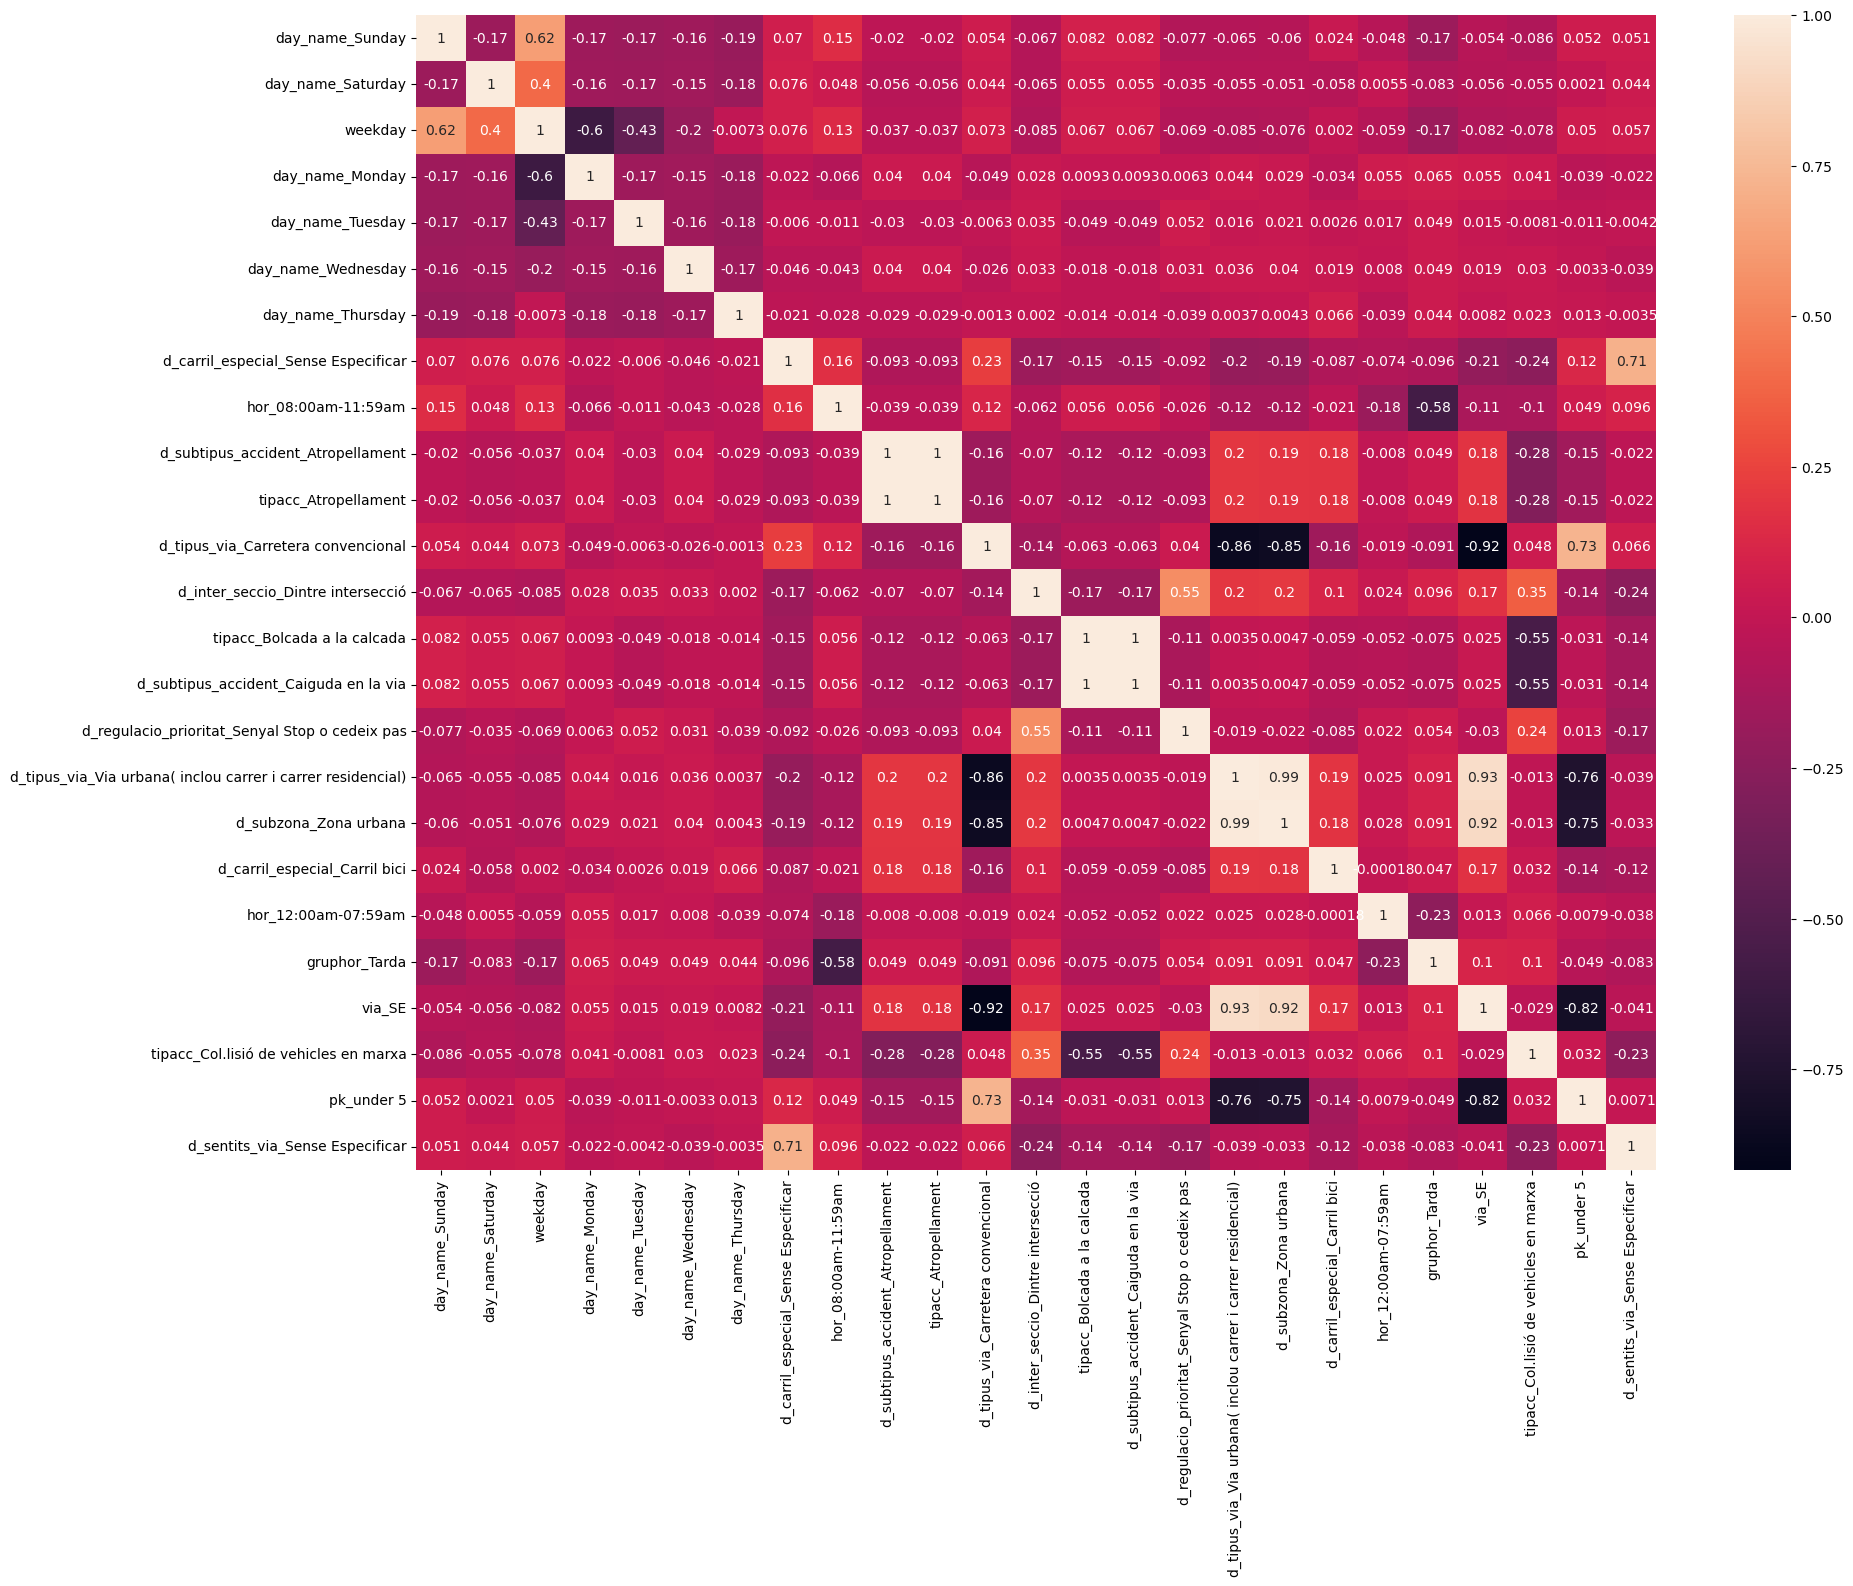

In [40]:
corr_matrix = coll_data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

In [41]:
col_viz = ['d_subzona_Zona urbana',"d_tipus_via_Via urbana( inclou carrer i carrer residencial)"]

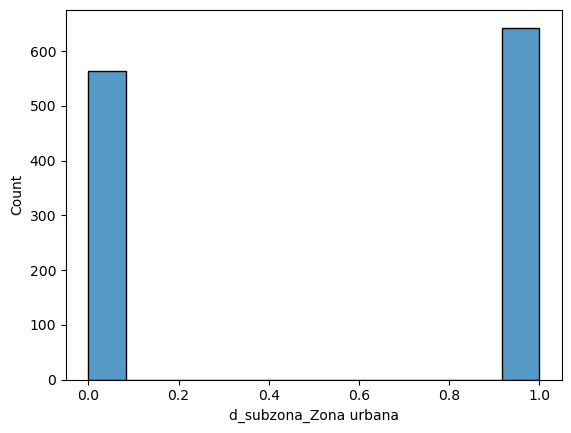

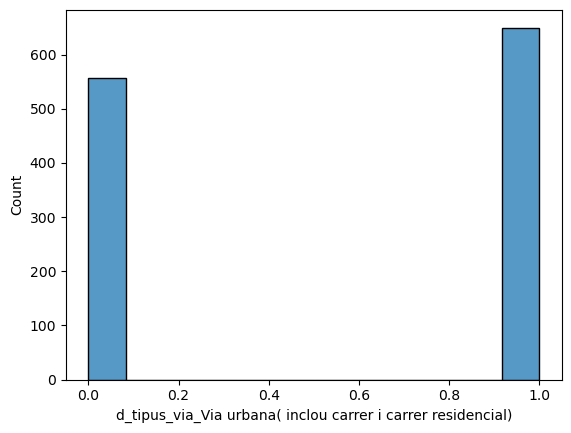

In [42]:
for column in coll_data[col_viz]:
    sns.histplot( x=coll_data[column])
    plt.show()

In [43]:
col_to_drop = ['d_tipus_via_Via urbana( inclou carrer i carrer residencial)']

In [44]:
X_train = X_train_all.drop(col_to_drop, axis = 1)
X_train.shape
X_test = X_test_all.drop(col_to_drop, axis = 1)
X_test

,day_name_Sunday,day_name_Saturday,weekday,day_name_Tuesday,day_name_Wednesday,day_name_Thursday,day_name_Monday,nomcom_Bages,d_titularitat_via_Sense Especificar,d_tipus_via_Carretera convencional,d_subzona_Zona urbana,d_caract_entorn_Mixt,d_carril_especial_Sense Especificar,zona_Zona urbana,nommun_BARCELONA,via_SE,d_sentits_via_Un sol sentit,nomcom_Barcelones,d_regulacio_prioritat_Semàfor,d_subtipus_accident_Caiguda en la via,tipacc_Bolcada a la calcada,d_titularitat_via_Estatal,d_titularitat_via_Provincial,d_titularitat_via_Autonòmica
0,0.0,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.0,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.0,0.0,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Running a model with the chosen features.

In [45]:
print("X_train:", X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",y_test.shape)
print("y_test:",y_test.shape)

X_train: (1206, 24)
y_train: (1206,)
X_test: (517,)
y_test: (517,)


In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(X_train, y_train)
print('TrainSet = ',clf.score(X_train, y_train))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.802653399668325
TestSet =  0.8027079303675049


C:\Users\joanv\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- d_caract_entorn_Mixt
- d_regulacio_prioritat_Semàfor
- d_sentits_via_Un sol sentit
- d_titularitat_via_Autonòmica
- d_titularitat_via_Estatal
- ...
Feature names seen at fit time, yet now missing:
- d_carril_especial_Carril bici
- d_inter_seccio_Dintre intersecció
- d_regulacio_prioritat_Senyal Stop o cedeix pas
- d_sentits_via_Sense Especificar
- d_subtipus_accident_Atropellament
- ...

  warnings.warn(message, FutureWarning)


In [47]:
y_train.value_counts()

Weekday    768
Weekend    438
Name: grupdialab, dtype: int64

C:\Users\joanv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\joanv\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- d_caract_entorn_Mixt
- d_regulacio_prioritat_Semàfor
- d_sentits_via_Un sol sentit
- d_titularitat_via_Autonòmica
- d_titularitat_via_Estatal
- ...
Feature names seen at fit time, yet now missing:
- d_carril_especial_Carril bici
- d_inter_seccio_Dintre intersecció
- d_regulacio_prioritat_Senyal Stop o cedeix pas
- d_sentits_via_Sense Especificar
- d_subtipus_accident_Atropellament
- ...

  war

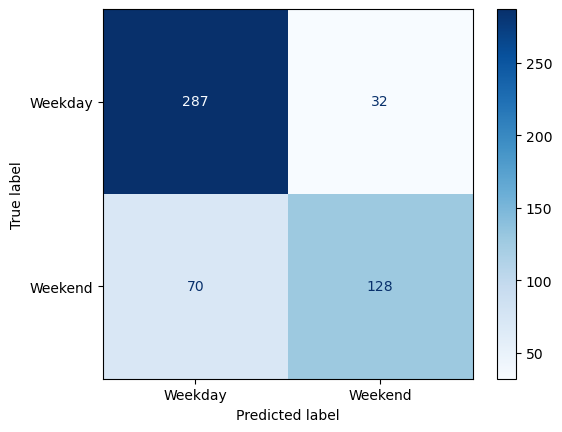

In [48]:
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

In [49]:
clf2 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf2.fit(X_train, y_train)
print('TrainSet = ',clf.score(X_train, y_train))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.802653399668325
TestSet =  0.8027079303675049


C:\Users\joanv\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- d_caract_entorn_Mixt
- d_regulacio_prioritat_Semàfor
- d_sentits_via_Un sol sentit
- d_titularitat_via_Autonòmica
- d_titularitat_via_Estatal
- ...
Feature names seen at fit time, yet now missing:
- d_carril_especial_Carril bici
- d_inter_seccio_Dintre intersecció
- d_regulacio_prioritat_Senyal Stop o cedeix pas
- d_sentits_via_Sense Especificar
- d_subtipus_accident_Atropellament
- ...

  warnings.warn(message, FutureWarning)


In [50]:
# scores with second cleaned data (less categorized)
pred_RF = clf2.predict(X_test)

print('accuracy:', accuracy_score(y_test, pred_RF))
print("precision: ",precision_score(y_test,pred_RF,pos_label='Weekday'))
print("recall: ",recall_score(y_test,pred_RF,pos_label='Weekday'))
print("f1: ",f1_score(y_test,pred_RF,pos_label='Weekday'))

accuracy: 0.8027079303675049
precision:  0.803921568627451
recall:  0.8996865203761756
f1:  0.849112426035503


C:\Users\joanv\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- d_caract_entorn_Mixt
- d_regulacio_prioritat_Semàfor
- d_sentits_via_Un sol sentit
- d_titularitat_via_Autonòmica
- d_titularitat_via_Estatal
- ...
Feature names seen at fit time, yet now missing:
- d_carril_especial_Carril bici
- d_inter_seccio_Dintre intersecció
- d_regulacio_prioritat_Senyal Stop o cedeix pas
- d_sentits_via_Sense Especificar
- d_subtipus_accident_Atropellament
- ...

  warnings.warn(message, FutureWarning)


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

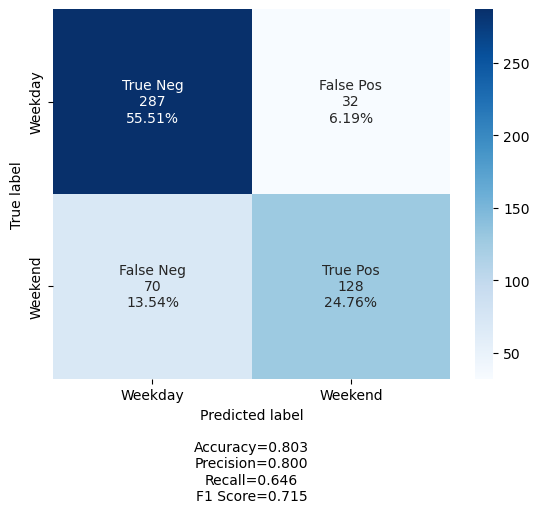

In [52]:
cf_matrix = confusion_matrix(y_test, pred_RF)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Weekday', 'Weekend']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap=plt.cm.Blues)

In [53]:
pred_RF = clf2.predict(X_test)


array = confusion_matrix(y_test, pred_RF)
Q1 = array[0][0]
Q2 = array[0][1]
Q3 = array[1][0]
Q4 = array[1][1]
print(Q1)
print(Q2)
print(Q3)
print(Q4)
print(categories[0])
print(categories[1])

287
32
70
128
Weekday
Weekend


C:\Users\joanv\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- d_caract_entorn_Mixt
- d_regulacio_prioritat_Semàfor
- d_sentits_via_Un sol sentit
- d_titularitat_via_Autonòmica
- d_titularitat_via_Estatal
- ...
Feature names seen at fit time, yet now missing:
- d_carril_especial_Carril bici
- d_inter_seccio_Dintre intersecció
- d_regulacio_prioritat_Senyal Stop o cedeix pas
- d_sentits_via_Sense Especificar
- d_subtipus_accident_Atropellament
- ...

  warnings.warn(message, FutureWarning)


In [54]:
print('In the above plot we can see that there are',Q3,'accidents with bikes of whom the model predicts they will be',categories[0], 'when they actually are',categories[1],'.')
print('There are also', Q2 ,'accidents with bikes of whom the model predicts they will be',categories[1],'when they actually are not.')

In the above plot we can see that there are 70 accidents with bikes of whom the model predicts they will be Weekday when they actually are Weekend .
There are also 32 accidents with bikes of whom the model predicts they will be Weekend when they actually are not.


# Running clasification models

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


In [56]:
def models_automation(models, X_train, y_train,X_test,y_test):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

In [57]:
model_list = [SGDClassifier(),KNeighborsClassifier(), MLPClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
models_automation(model_list, X_train,y_train,X_test,y_test)

C:\Users\joanv\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- d_caract_entorn_Mixt
- d_regulacio_prioritat_Semàfor
- d_sentits_via_Un sol sentit
- d_titularitat_via_Autonòmica
- d_titularitat_via_Estatal
- ...
Feature names seen at fit time, yet now missing:
- d_carril_especial_Carril bici
- d_inter_seccio_Dintre intersecció
- d_regulacio_prioritat_Senyal Stop o cedeix pas
- d_sentits_via_Sense Especificar
- d_subtipus_accident_Atropellament
- ...

  warnings.warn(message, FutureWarning)


SGDClassifier: Train -> 0.8051409618573798, Test -> 0.7872340425531915


C:\Users\joanv\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- d_caract_entorn_Mixt
- d_regulacio_prioritat_Semàfor
- d_sentits_via_Un sol sentit
- d_titularitat_via_Autonòmica
- d_titularitat_via_Estatal
- ...
Feature names seen at fit time, yet now missing:
- d_carril_especial_Carril bici
- d_inter_seccio_Dintre intersecció
- d_regulacio_prioritat_Senyal Stop o cedeix pas
- d_sentits_via_Sense Especificar
- d_subtipus_accident_Atropellament
- ...

  warnings.warn(message, FutureWarning)


KNeighborsClassifier: Train -> 0.8474295190713101, Test -> 0.7852998065764023


C:\Users\joanv\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\joanv\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- d_caract_entorn_Mixt
- d_regulacio_prioritat_Semàfor
- d_sentits_via_Un sol sentit
- d_titularitat_via_Autonòmica
- d_titularitat_via_Estatal
- ...
Feature names seen at fit time, yet now missing:
- d_carril_especial_Carril bici
- d_inter_seccio_Dintre intersecció
- d_regulacio_prioritat_Senyal Stop o cedeix pas
- d_sentits_via_Sense Especificar
- d_subtipus_accident_Atropellament
- ...

  warnings.warn(message, FutureWarning)
C:\Users\joanv\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match

MLPClassifier: Train -> 0.835820895522388, Test -> 0.7852998065764023
DecisionTreeClassifier: Train -> 0.9013266998341625, Test -> 0.7059961315280464
RandomForestClassifier: Train -> 0.9013266998341625, Test -> 0.793036750483559


C:\Users\joanv\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- d_caract_entorn_Mixt
- d_regulacio_prioritat_Semàfor
- d_sentits_via_Un sol sentit
- d_titularitat_via_Autonòmica
- d_titularitat_via_Estatal
- ...
Feature names seen at fit time, yet now missing:
- d_carril_especial_Carril bici
- d_inter_seccio_Dintre intersecció
- d_regulacio_prioritat_Senyal Stop o cedeix pas
- d_sentits_via_Sense Especificar
- d_subtipus_accident_Atropellament
- ...

  warnings.warn(message, FutureWarning)


# Conclusion. The best model to make predictions would be RandomForestClassifier, so it's de model that we runned before and made predictions.